In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq
import math
import time
import tkinter as tk
from tkinter import messagebox


In [7]:
# Global variables
grid_size = 15
grid = np.zeros((grid_size, grid_size))

# Create obstacles (buildings, houses, vehicles)
obstacle_percentage = 0.2
for _ in range(int(grid_size * grid_size * obstacle_percentage)):
    x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
    grid[x, y] = 1

# Start position
start = (0, 0)
grid[start] = 2  # Start point

# Euclidean distance heuristic function
def heuristic(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# A* algorithm
def a_star_search(start, goal, grid):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, down, left, up
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + 1
            if 0 <= neighbor[0] < grid_size:
                if 0 <= neighbor[1] < grid_size:
                    if grid[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return False

# Best-First Search algorithm
def best_first_search(start, goal, grid):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    visited = set()

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path

        visited.add(current)
        for dx, dy in neighbors:
            neighbor = current[0] + dx, current[1] + dy
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size:
                if grid[neighbor[0]][neighbor[1]] == 1 or neighbor in visited:
                    continue

                priority = heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_list]:
                    came_from[neighbor] = current
                    heapq.heappush(open_list, (priority, neighbor))

    return False


In [8]:
# Performance evaluation
def evaluate_performance():
    global grid, grid_size

    # Random start position
    start = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    while grid[start] == 1:
        start = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    grid[start] = 2  # Start point

    # Random goal position
    goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    while grid[goal] == 1 or goal == start:
        goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    grid[goal] = 3  # Goal point

    # Measure A* algorithm performance
    start_time = time.time()
    path_a_star = a_star_search(start, goal, grid)
    a_star_time = time.time() - start_time
    a_star_length = len(path_a_star) if path_a_star else float('inf')

    # Measure Best-First Search algorithm performance
    start_time = time.time()
    path_best_first = best_first_search(start, goal, grid)
    best_first_time = time.time() - start_time
    best_first_length = len(path_best_first) if path_best_first else float('inf')

    # Display results in a message box
    message = f"A* Algorithm:\nTime={a_star_time}, Length={a_star_length}\n\n" \
              f"Best-First Search Algorithm:\nTime={best_first_time}, Length={best_first_length}"
    messagebox.showinfo("Performance Evaluation", message)


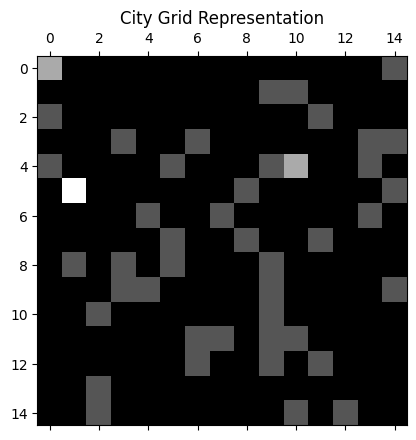

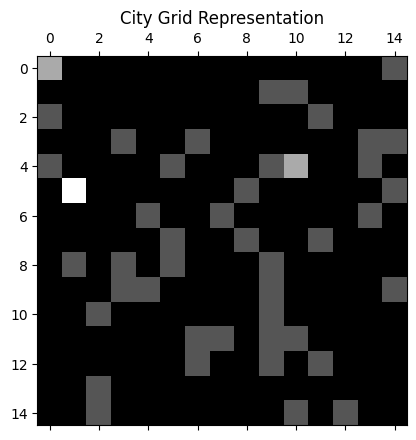

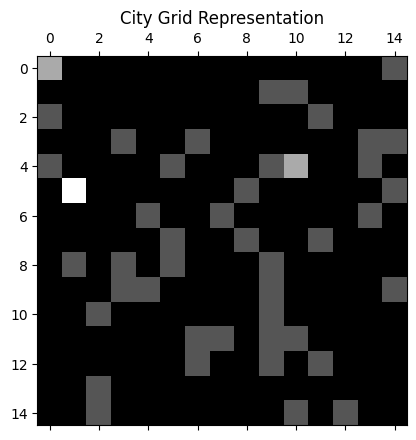

In [11]:
# GUI setup
def create_gui():
    global grid

    # Create Tkinter window
    window = tk.Tk()
    window.title("City Navigation Simulator")

    # Function to visualize grid
    def visualize_grid():
        fig, ax = plt.subplots()
        ax.matshow(grid, cmap='gray')
        plt.title("City Grid Representation")
        plt.show()

    # Button to visualize grid
    visualize_button = tk.Button(window, text="Visualize City Grid", command=visualize_grid)
    visualize_button.pack(pady=10)

    # Button to evaluate performance
    evaluate_button = tk.Button(window, text="Evaluate Performance", command=evaluate_performance)
    evaluate_button.pack(pady=10)

    # Run the Tkinter main loop
    window.mainloop()

# Run the GUI
create_gui()
